In [59]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [60]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### List of positive and negative words

In [61]:
positive = pd.read_csv('MasterDictionary/positive-words.txt', header=None)
negative = pd.read_csv('MasterDictionary/negative-words.txt', header=None, encoding='ISO-8859-1')

In [62]:
positive.columns=['words']
negative.columns=['words']

### Article data

In [63]:
data = pd.read_csv('Extracted_text/38.txt')
data

,Unnamed: 0,art_title,art_text
0,0,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying ..."


In [64]:
data.drop('Unnamed: 0', inplace=True, axis=1)

### Counting number of sentences

In [65]:
def number_of_sentences(text):
    z = text
    for i in z:
        text_str = ''.join(i)
        
    nltk.download('punkt')
    from nltk.tokenize import sent_tokenize

    sentences = text_str

    tokenize_sentences = sent_tokenize(sentences)
    number_of_sentences = len(tokenize_sentences)
    return number_of_sentences 
number_of_sentences(data['art_text'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


80

### Counting personal pronouns

In [66]:
def count_personal_pronouns(text_str):   
    import re

    pronounRegex = re.compile(r'I|he|him|her|ours|it|me|she|them|they|us|we|you',re.I)
    pronouns = pronounRegex.findall(text_str.lower())
    pronouns_count = len(pronouns)
    return pronouns_count

### Functions to remove stop_words

In [67]:
def remove_punc(text):
    for ele in text:
        if ele in string.punctuation:
            text = text.replace(ele,'')
    return text   

### Average word length

In [68]:
def avg_word_length(text):
    z = text
    for i in z:
        text_str = ''.join(i)
    char_count = len(text_str)
    words_without_puncs = remove_punc(text_str)
    word_counts = len(word_tokenize(words_without_puncs))
    
    return (char_count/word_counts)
avg_word_length(data['art_text'])

5.848965517241379

In [69]:
import os
all_files = os.listdir("StopWords/")

def read_first_line(file):
    f = open('StopWords/{}'.format(file),'r')
    StopWords_ = f.read().split('\n')
    return StopWords_

output_strings = list(map(read_first_line, all_files))
    
stop_list = list(np.concatenate(output_strings))

In [70]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(stop_list)
    
    word_tokens = word_tokenize(text)
    filter_sentence = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            filter_sentence.append(w)
    return filter_sentence

In [71]:
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

In [72]:
def syllables_word_count(text):
    
    from nltk.corpus import cmudict
    d = cmudict.dict()
    
    def syllables_count(word):
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]]
    
    words_with_syllables_list=[]
    complex_words_list = []
    for i in text:
        try:
            words_with_syllables_list.append(syllables_count(i))
        except Exception as e:
            pass

    for i in words_with_syllables_list:
        if i[0] > 2:
            complex_words_list.append(i)

    total_syllables = len(words_with_syllables_list)
    complex_words = len(complex_words_list)
    
    return (total_syllables,complex_words)

In [81]:
syllables_word_count(data['art_text'][0])

(576, 189)

### Applying on data

In [73]:
data['art_text'] = data['art_text'].map(remove_punc)
data['art_text'] = data['art_text'].map(remove_stop_words)
data['art_text'] = data['art_text'].map(skip_numeric)

### Counting number of positive words

In [74]:
positive_word_count = data['art_text'].map(lambda x: len([w for w in x if w in list(positive['words'])]))
positive_word_count

0    56
Name: art_text, dtype: int64

### Counting number of positive words

In [75]:
negative_word_count = data['art_text'].map(lambda x: len([w for w in x if w in list(negative['words'])]))
negative_word_count*-1

0   -37
Name: art_text, dtype: int64

### Polarity_score

(Positive Score – Negative Score)/ ((Positive Score + Negative Score) + 0.000001)

In [76]:
Polarity_score = (positive_word_count-negative_word_count)/((positive_word_count+negative_word_count)+ 0.000001)
Polarity_score

0    0.204301
Name: art_text, dtype: float64

### Subjectivity Score

Subjectivity_Score = (positive_word_count + negative_word_count)/ ((count) + 0.000001)

In [77]:
num_words = 0
for i in np.concatenate(data['art_text']):
    num_words+=1
num_words

623

In [79]:
Subjectivity_Score = (positive_word_count + negative_word_count)/ ((num_words) + 0.000001)
Subjectivity_Score

0    0.149278
Name: art_text, dtype: float64

# Analysis of readability

### Avg sentence length

Average Sentence Length = the number of words / the number of sentences

In [259]:
avg_sentence_length = num_words/number_of_sentences
avg_sentence_length

7.7875

### syllables

In [260]:
syllables_word_count(data['art_text'][0])

(576, 189)

### Percentage of Complex words

Percentage of Complex words = the number of complex words / the number of words 

In [261]:
percentage_of_complex_word = syllables_word_count(data['art_text'][0])[1]/num_words
percentage_of_complex_word

0.30337078651685395

### Fox Index

Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [262]:
fog_index = 0.4*(avg_sentence_length+percentage_of_complex_word)
fog_index

3.236348314606742

### Average Number of Words Per Sentence

Average Number of Words Per Sentence = the total number of words / the total number of sentences

In [263]:
avg_no_words_per_sentence = num_words/number_of_sentences
avg_no_words_per_sentence

7.7875

# Word-Cloud

In [264]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [265]:
master_list = []
k=0
for j in range(data.shape[0]):
    text = " ".join(i for i in data['art_text'][data.index[k]])
    master_list.append(text)
    k+=1

In [266]:
master_text = " ".join(i for i in master_list)
len(master_text)

4805

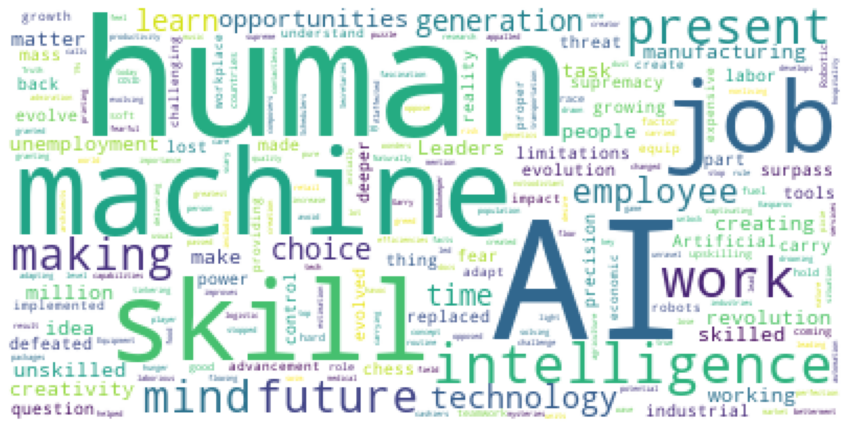

In [267]:
wordcloud = WordCloud(background_color='white', max_words=1500).generate(master_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()